## After Claening Data

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("/content/drive/MyDrive/final_dataset(1).csv")
df.head()

,destination port,flow duration,total fwd packets,total backward packets,total length of fwd packets,total length of bwd packets,fwd packet length max,fwd packet length min,fwd packet length mean,fwd packet length std,...,min_seg_size_forward,active mean,active std,active max,active min,idle mean,idle std,idle max,idle min,label
0,54865,3.0,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109.0,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52.0,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34.0,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3.0,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [26]:
df.shape

(2470833, 77)

## Reduce the data storage

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470833 entries, 0 to 2470832
Data columns (total 77 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination port             int64  
 1   flow duration                float64
 2   total fwd packets            int64  
 3   total backward packets       int64  
 4   total length of fwd packets  int64  
 5   total length of bwd packets  int64  
 6   fwd packet length max        int64  
 7   fwd packet length min        int64  
 8   fwd packet length mean       float64
 9   fwd packet length std        float64
 10  bwd packet length max        int64  
 11  bwd packet length min        int64  
 12  bwd packet length mean       float64
 13  bwd packet length std        float64
 14  flow bytes/s                 float64
 15  flow packets/s               float64
 16  flow iat mean                float64
 17  flow iat std                 float64
 18  flow iat max                 float64
 19  

In [28]:
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype(np.float32)

for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype(np.int32)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470833 entries, 0 to 2470832
Data columns (total 77 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination port             int32  
 1   flow duration                float32
 2   total fwd packets            int32  
 3   total backward packets       int32  
 4   total length of fwd packets  int32  
 5   total length of bwd packets  int32  
 6   fwd packet length max        int32  
 7   fwd packet length min        int32  
 8   fwd packet length mean       float32
 9   fwd packet length std        float32
 10  bwd packet length max        int32  
 11  bwd packet length min        int32  
 12  bwd packet length mean       float32
 13  bwd packet length std        float32
 14  flow bytes/s                 float32
 15  flow packets/s               float32
 16  flow iat mean                float32
 17  flow iat std                 float32
 18  flow iat max                 float32
 19  

## Grouping label values to reduce imbalance problem

In [30]:
df["label"].value_counts()

,count
label,
BENIGN,2046251
DoS Hulk,171840
DDoS,127995
PortScan,90694
DoS GoldenEye,10276
FTP-Patator,5927
DoS slowloris,5385
DoS Slowhttptest,5227
SSH-Patator,3153


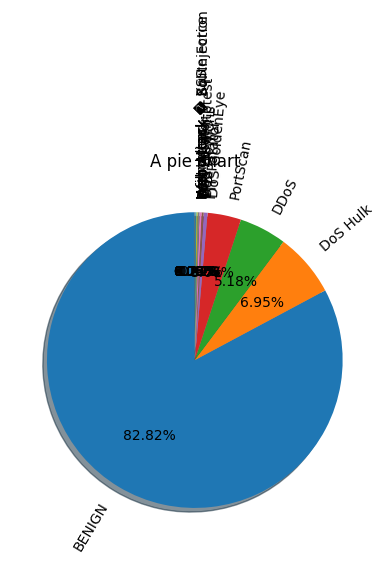

In [31]:
data =df["label"].value_counts()
label = df["label"].value_counts().index
plt.pie(data, labels=label, shadow=True, startangle=90, autopct="%1.2f%%", rotatelabels=True)
plt.title("A pie chart")
plt.show()

## Grouping categories and reduce them from 15 to 9

In [32]:
mapping = {
    'BENIGN': 'Benign',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'DDoS': 'DDoS',
    'PortScan': 'PortScan',
    'Bot': 'Bot',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

df['Attack_Category'] = df['label'].map(mapping)
df["Attack_Category"].value_counts()

,count
Attack_Category,
Benign,2046251
DoS,192728
DDoS,127995
PortScan,90694
Brute Force,9080
Web Attack,2099
Bot,1944
Infiltration,35
Heartbleed,7


## percentage of each class

In [33]:
round(df["Attack_Category"].value_counts()/len(df)*100 , 5)

,count
Attack_Category,
Benign,82.81624
DoS,7.80012
DDoS,5.18024
PortScan,3.67058
Brute Force,0.36749
Web Attack,0.08495
Bot,0.07868
Infiltration,0.00142
Heartbleed,0.00028


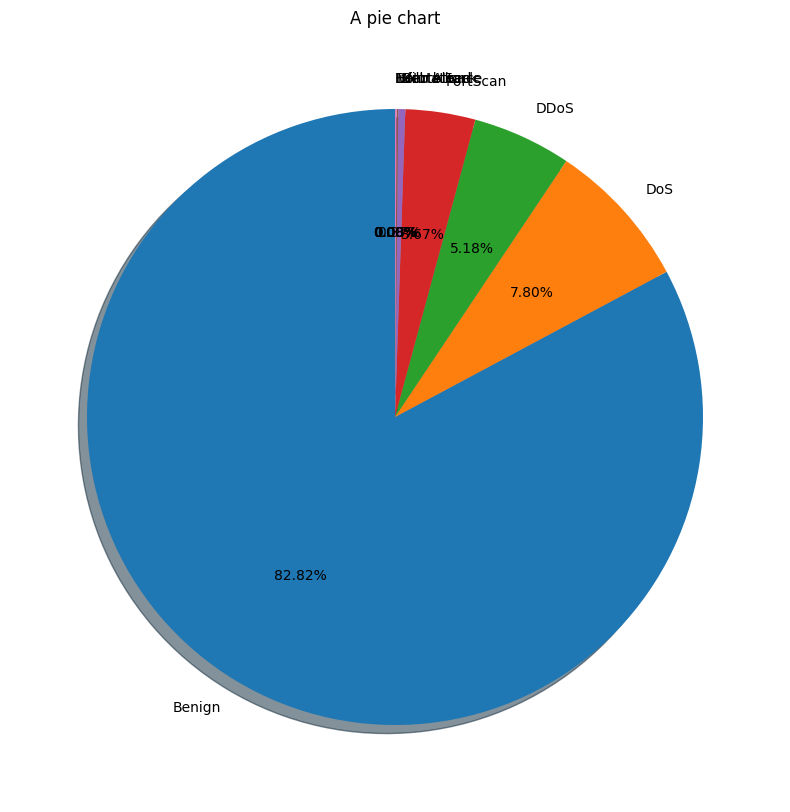

In [34]:
data =df["Attack_Category"].value_counts()
label = df["Attack_Category"].value_counts().index
plt.figure(figsize=(10,10))
plt.title("A pie chart")
plt.pie(data, labels=label, shadow=True, startangle=90, autopct="%1.2f%%", rotatelabels=False)
plt.show()

In [35]:
df.drop(columns=["label"] , inplace = True)
df.shape

(2470833, 77)

## Encoding the label values with label encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["label"] = label.fit_transform(df["Attack_Category"])
df.head()

,destination port,flow duration,total fwd packets,total backward packets,total length of fwd packets,total length of bwd packets,fwd packet length max,fwd packet length min,fwd packet length mean,fwd packet length std,...,active mean,active std,active max,active min,idle mean,idle std,idle max,idle min,Attack_Category,label
0,54865,3.0,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,0
1,55054,109.0,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,0
2,55055,52.0,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,0
3,46236,34.0,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,0
4,54863,3.0,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,0


## Calculate feature importance

In [37]:
from lightgbm import LGBMClassifier


df_sample = df.sample(n=400_000, random_state=42)
x = df_sample.drop(columns=["Attack_Category", "label"])
y = df_sample["label"]

model = LGBMClassifier(
    n_estimators=100,
    random_state=42,
    verbose=-1
)

model.fit(x, y)
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": x.columns,
    "importance": feature_importance
}).sort_values(by="importance", ascending=False)

print("Feature importance from LightGBM:")
print(importance_df)




Feature importance from LightGBM:
                 feature  importance
0       destination port        3116
19          flow iat min        1531
24           fwd iat min        1101
14          flow bytes/s        1048
1          flow duration        1010
..                   ...         ...
65     subflow bwd bytes           0
60  bwd avg packets/bulk           0
61     bwd avg bulk rate           0
62   subflow fwd packets           0
63     subflow fwd bytes           0

[76 rows x 2 columns]


## we reduced features from  ( 80 ---> 46 )

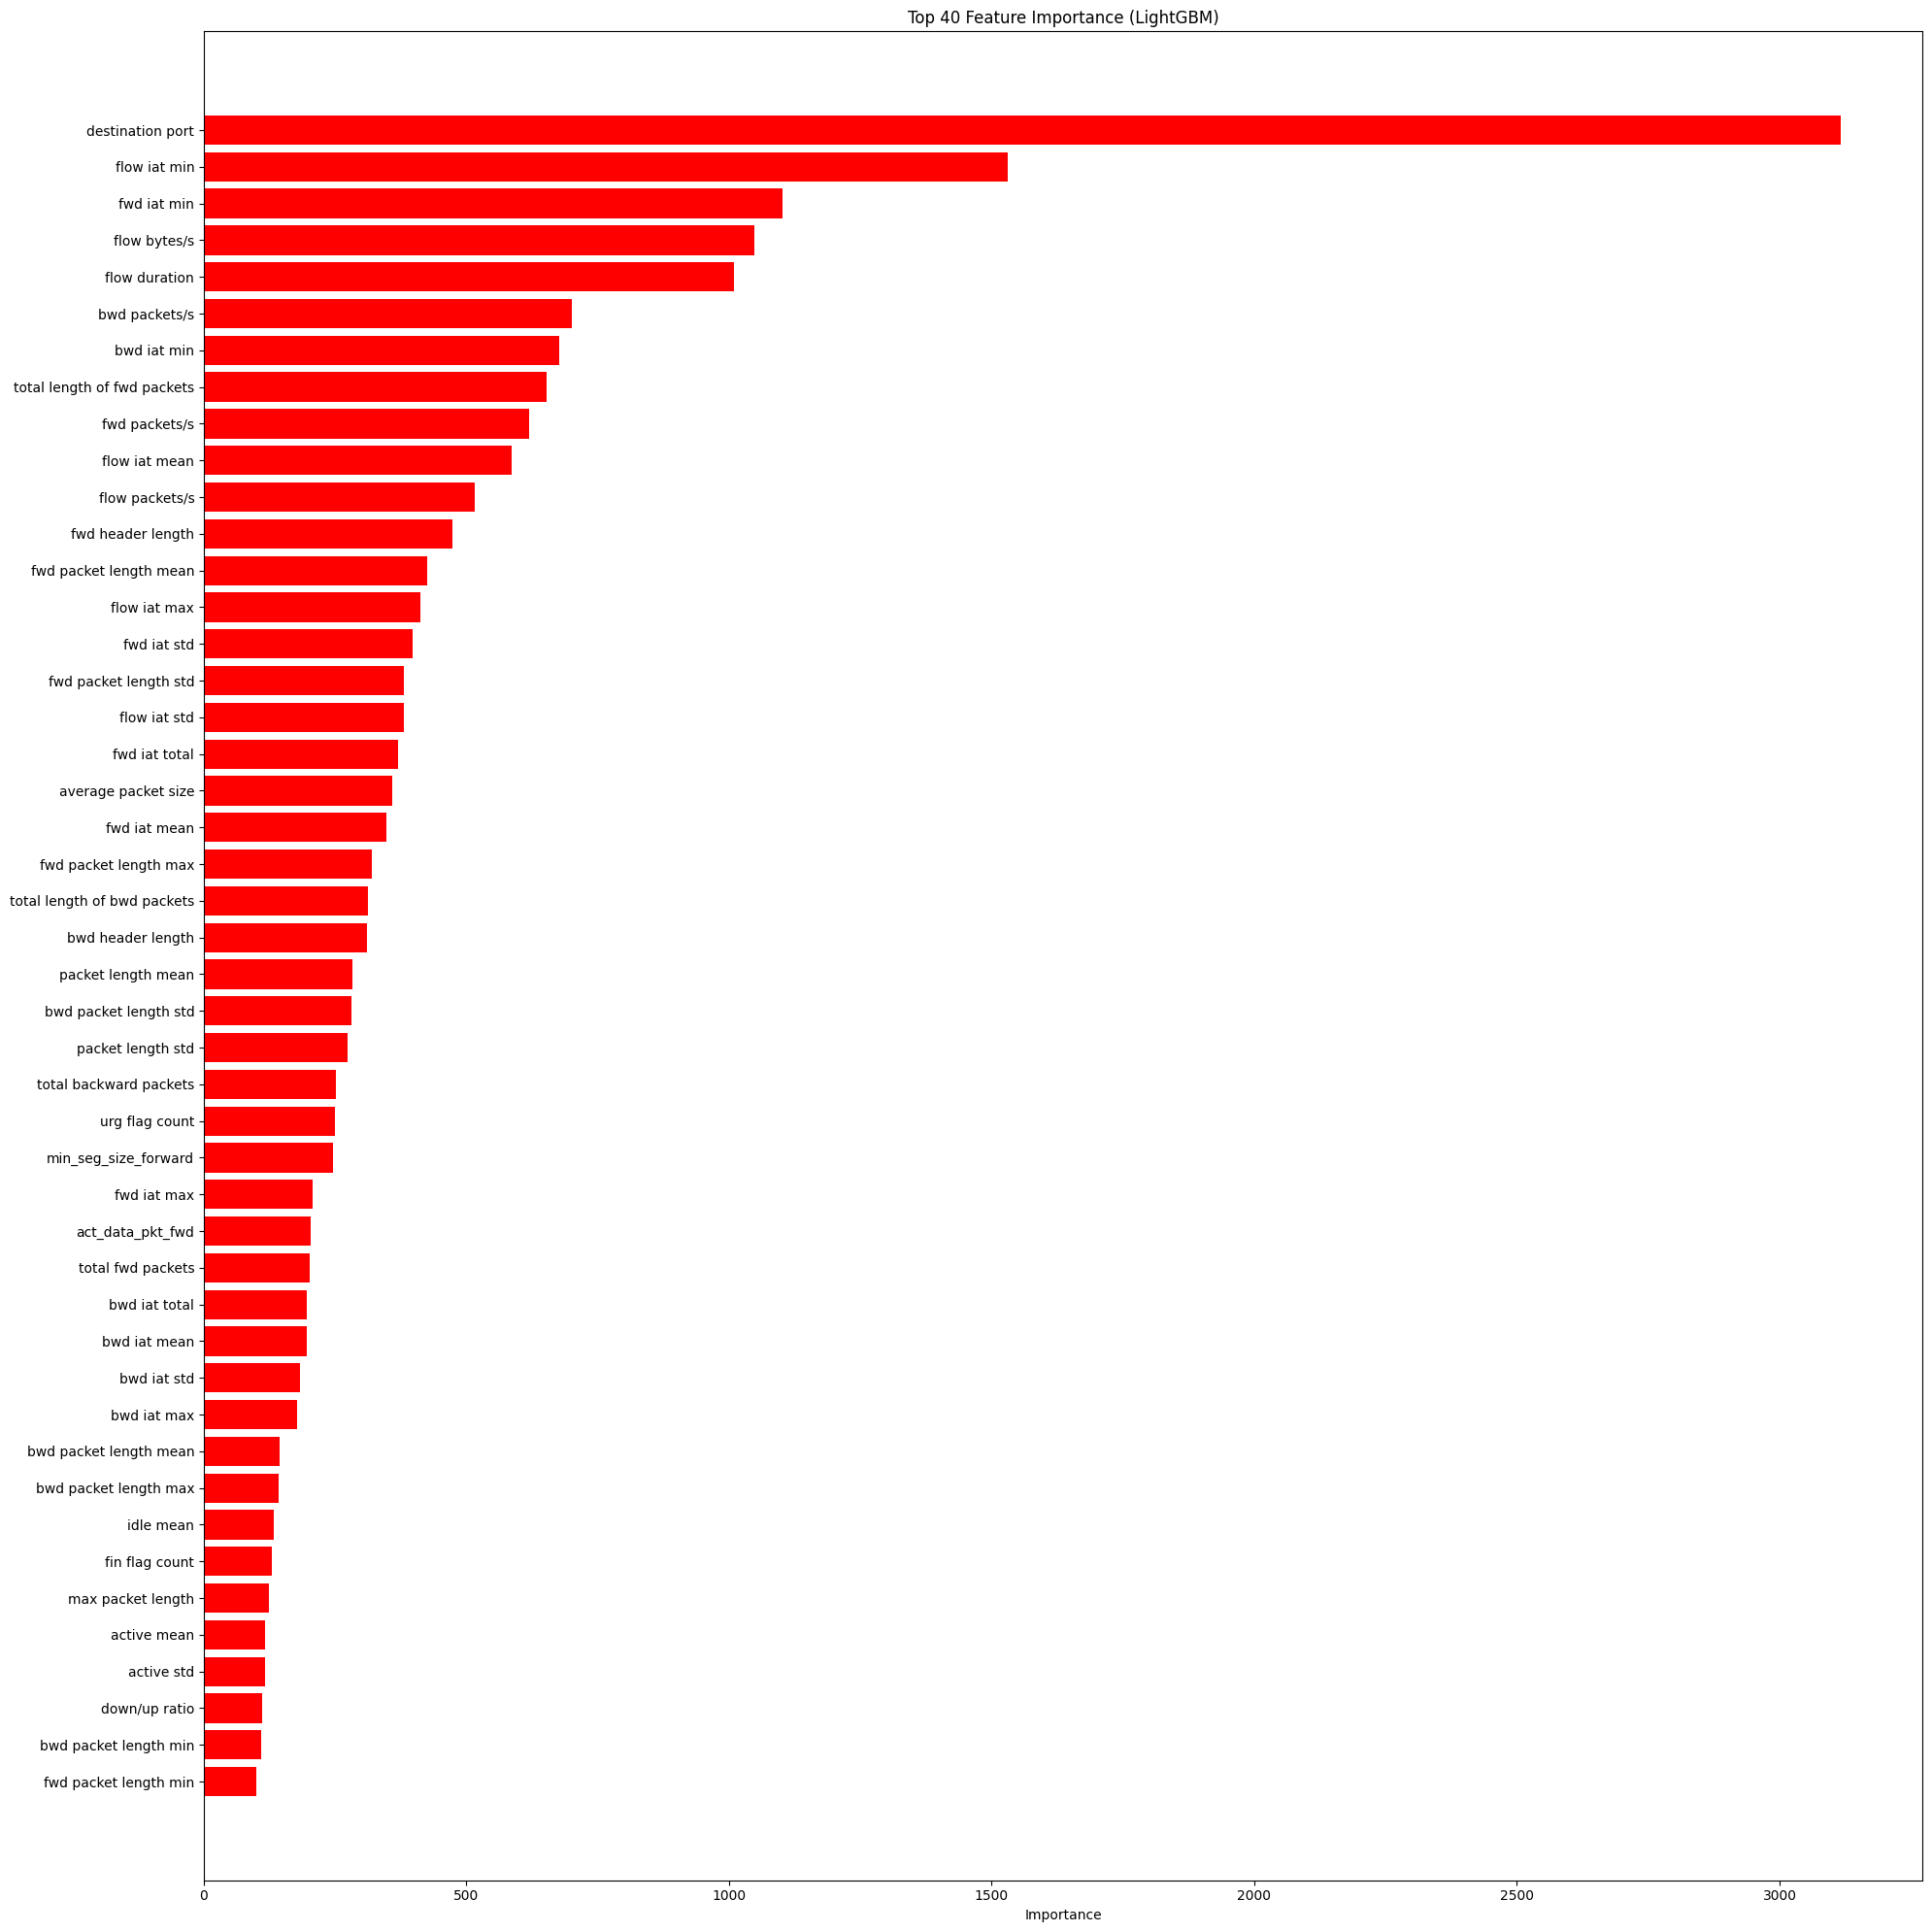

In [38]:
plt.figure(figsize=(20, 20))
plt.barh(importance_df["feature"][:46], importance_df["importance"][:46] , color = "red" )
plt.gca().invert_yaxis()
plt.title("Top 40 Feature Importance (LightGBM)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [39]:
Top_46_feature = importance_df[importance_df['importance'] >= 100 ].set_index(x for x in range(1 ,47))
Top_46_feature

,feature,importance
1,destination port,3116
2,flow iat min,1531
3,fwd iat min,1101
4,flow bytes/s,1048
5,flow duration,1010
6,bwd packets/s,700
7,bwd iat min,677
8,total length of fwd packets,652
9,fwd packets/s,619
10,flow iat mean,586


## heatmap for top 46 feature

/tmp/ipython-input-3688765709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["label"] = df["label"]


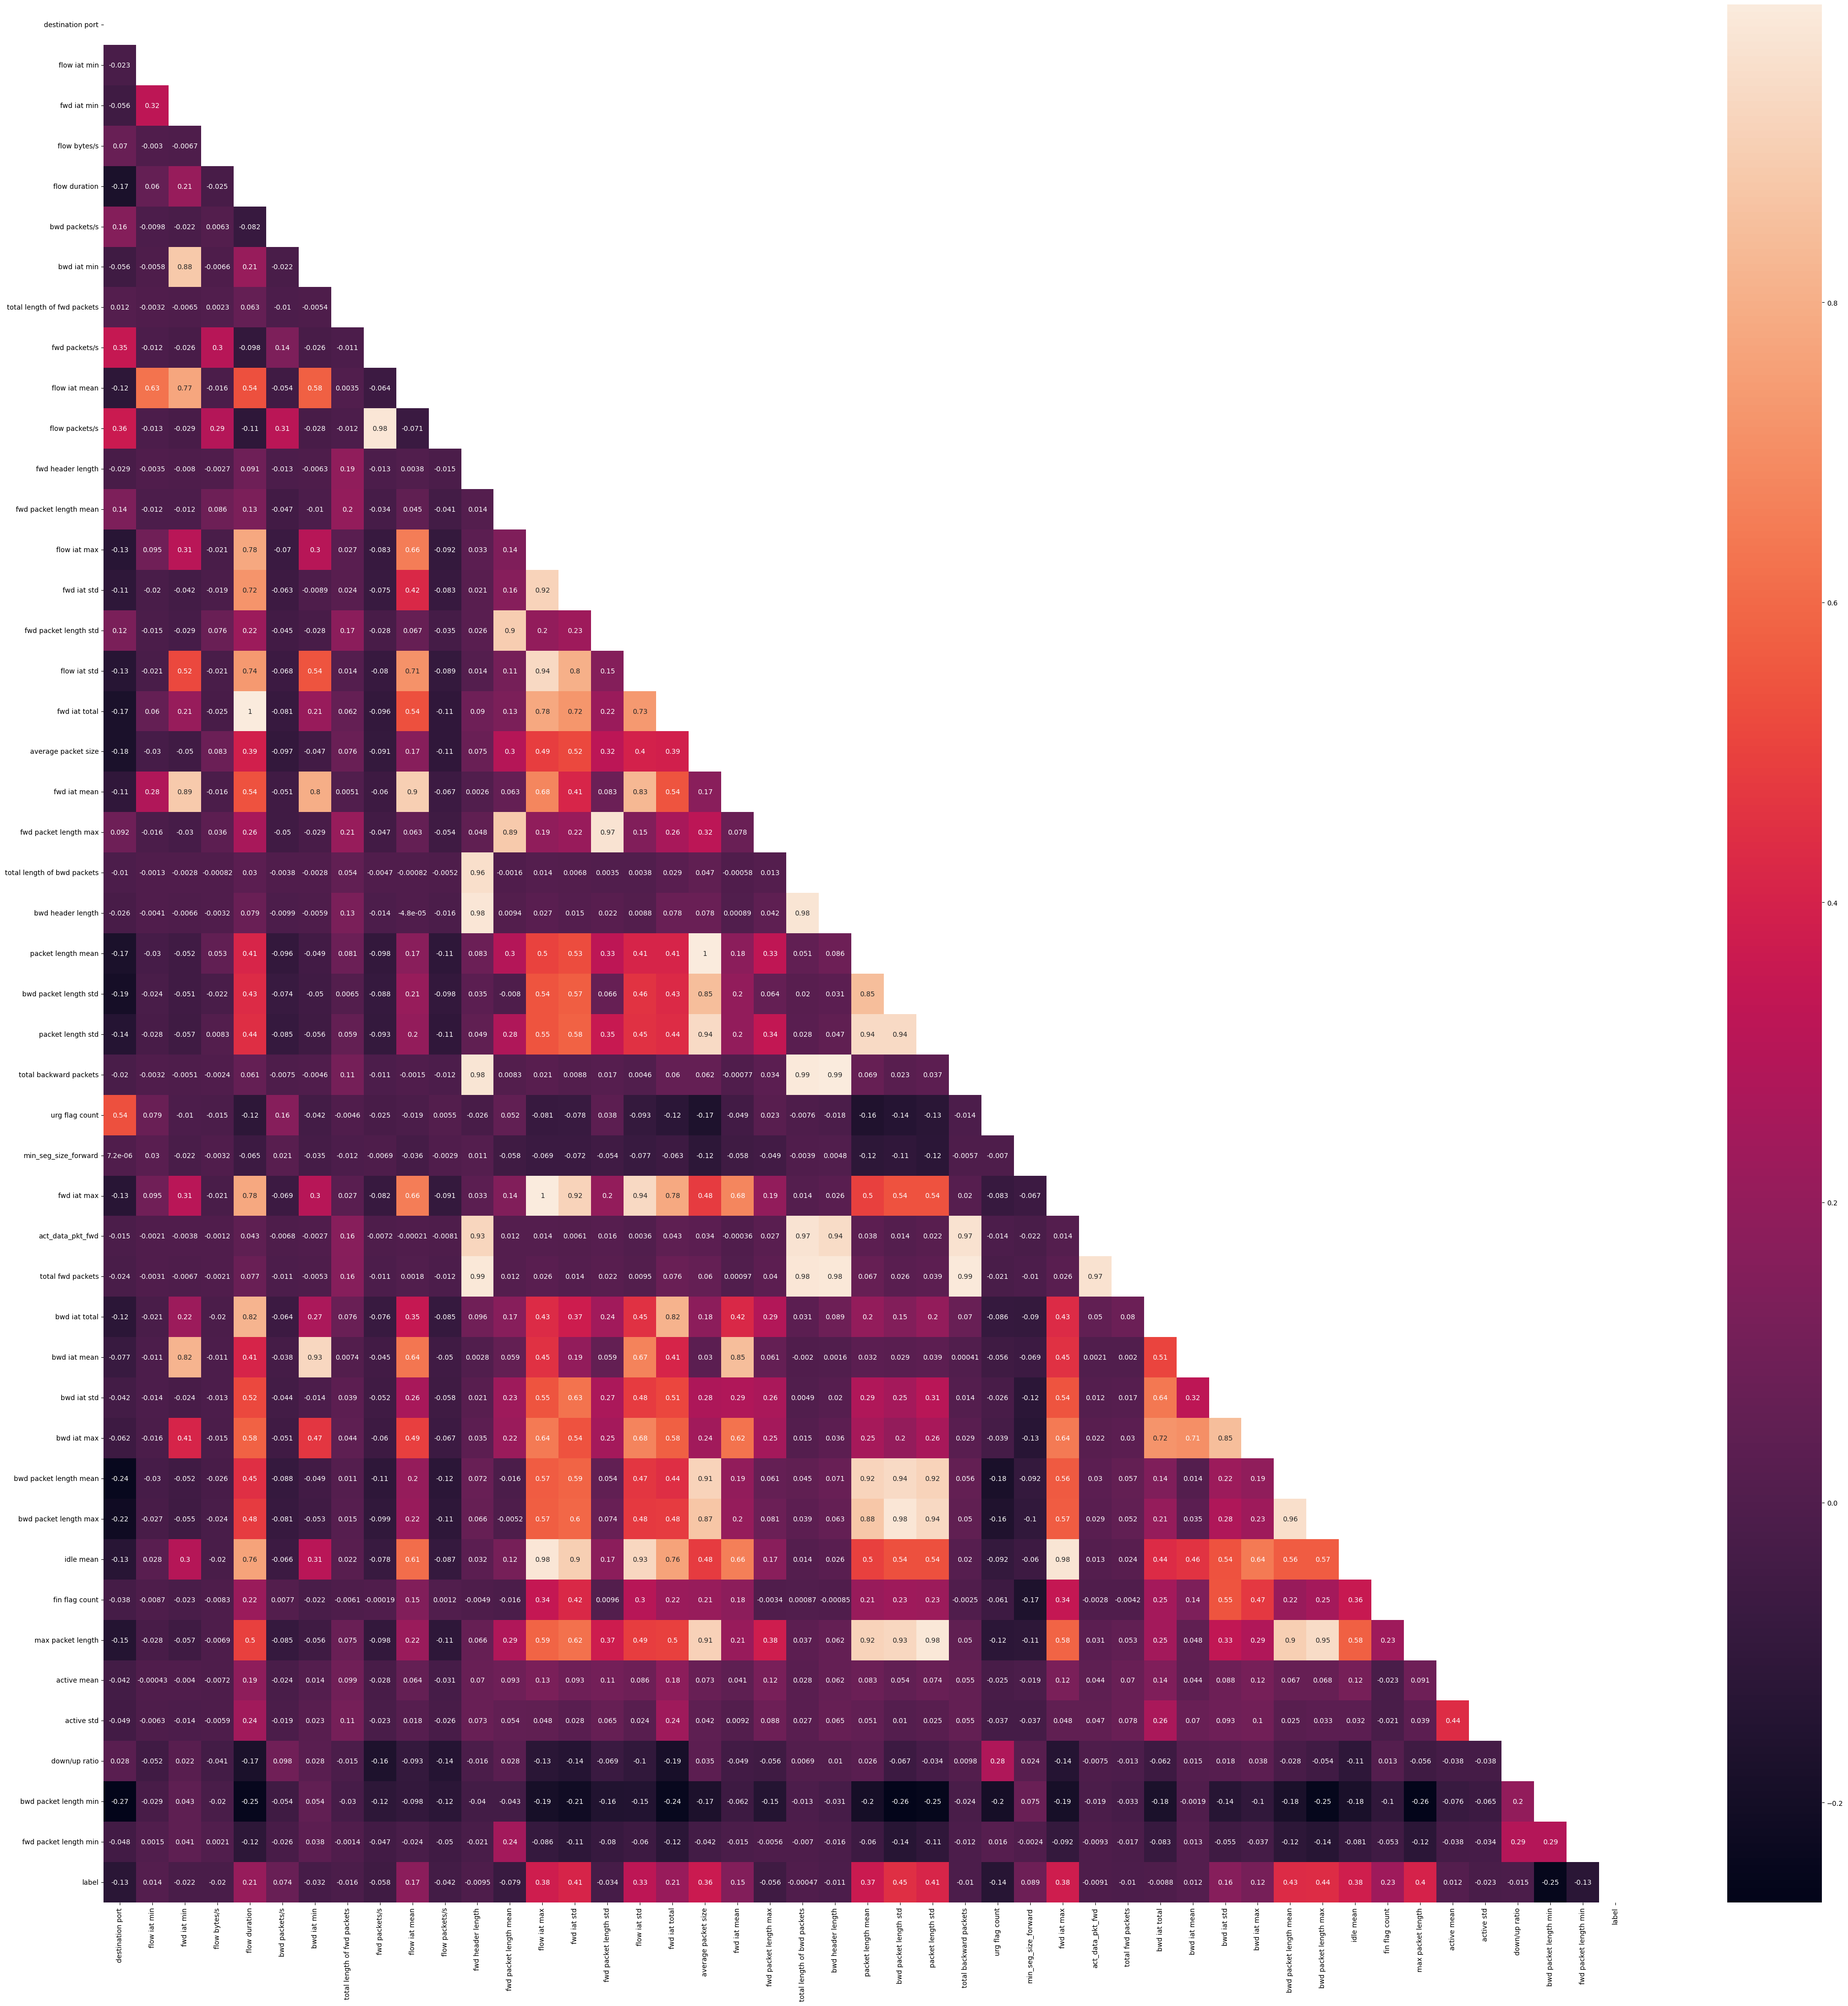

In [41]:
df_2 = df[[x for x in Top_46_feature["feature"]]]
df_2["label"] = df["label"]
df_2_matrix = df_2.corr()
mask = np.triu(np.ones_like(df_2_matrix , dtype=bool))


plt.figure(figsize=(50,50))
sns.heatmap(df_2_matrix , mask=mask ,  annot= True )
plt.savefig("heatmap_for_46_feature.png", dpi=300, bbox_inches='tight')
plt.show()

## Heatmap for high correlated features

/tmp/ipython-input-1939579767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["label"] = df["label"]


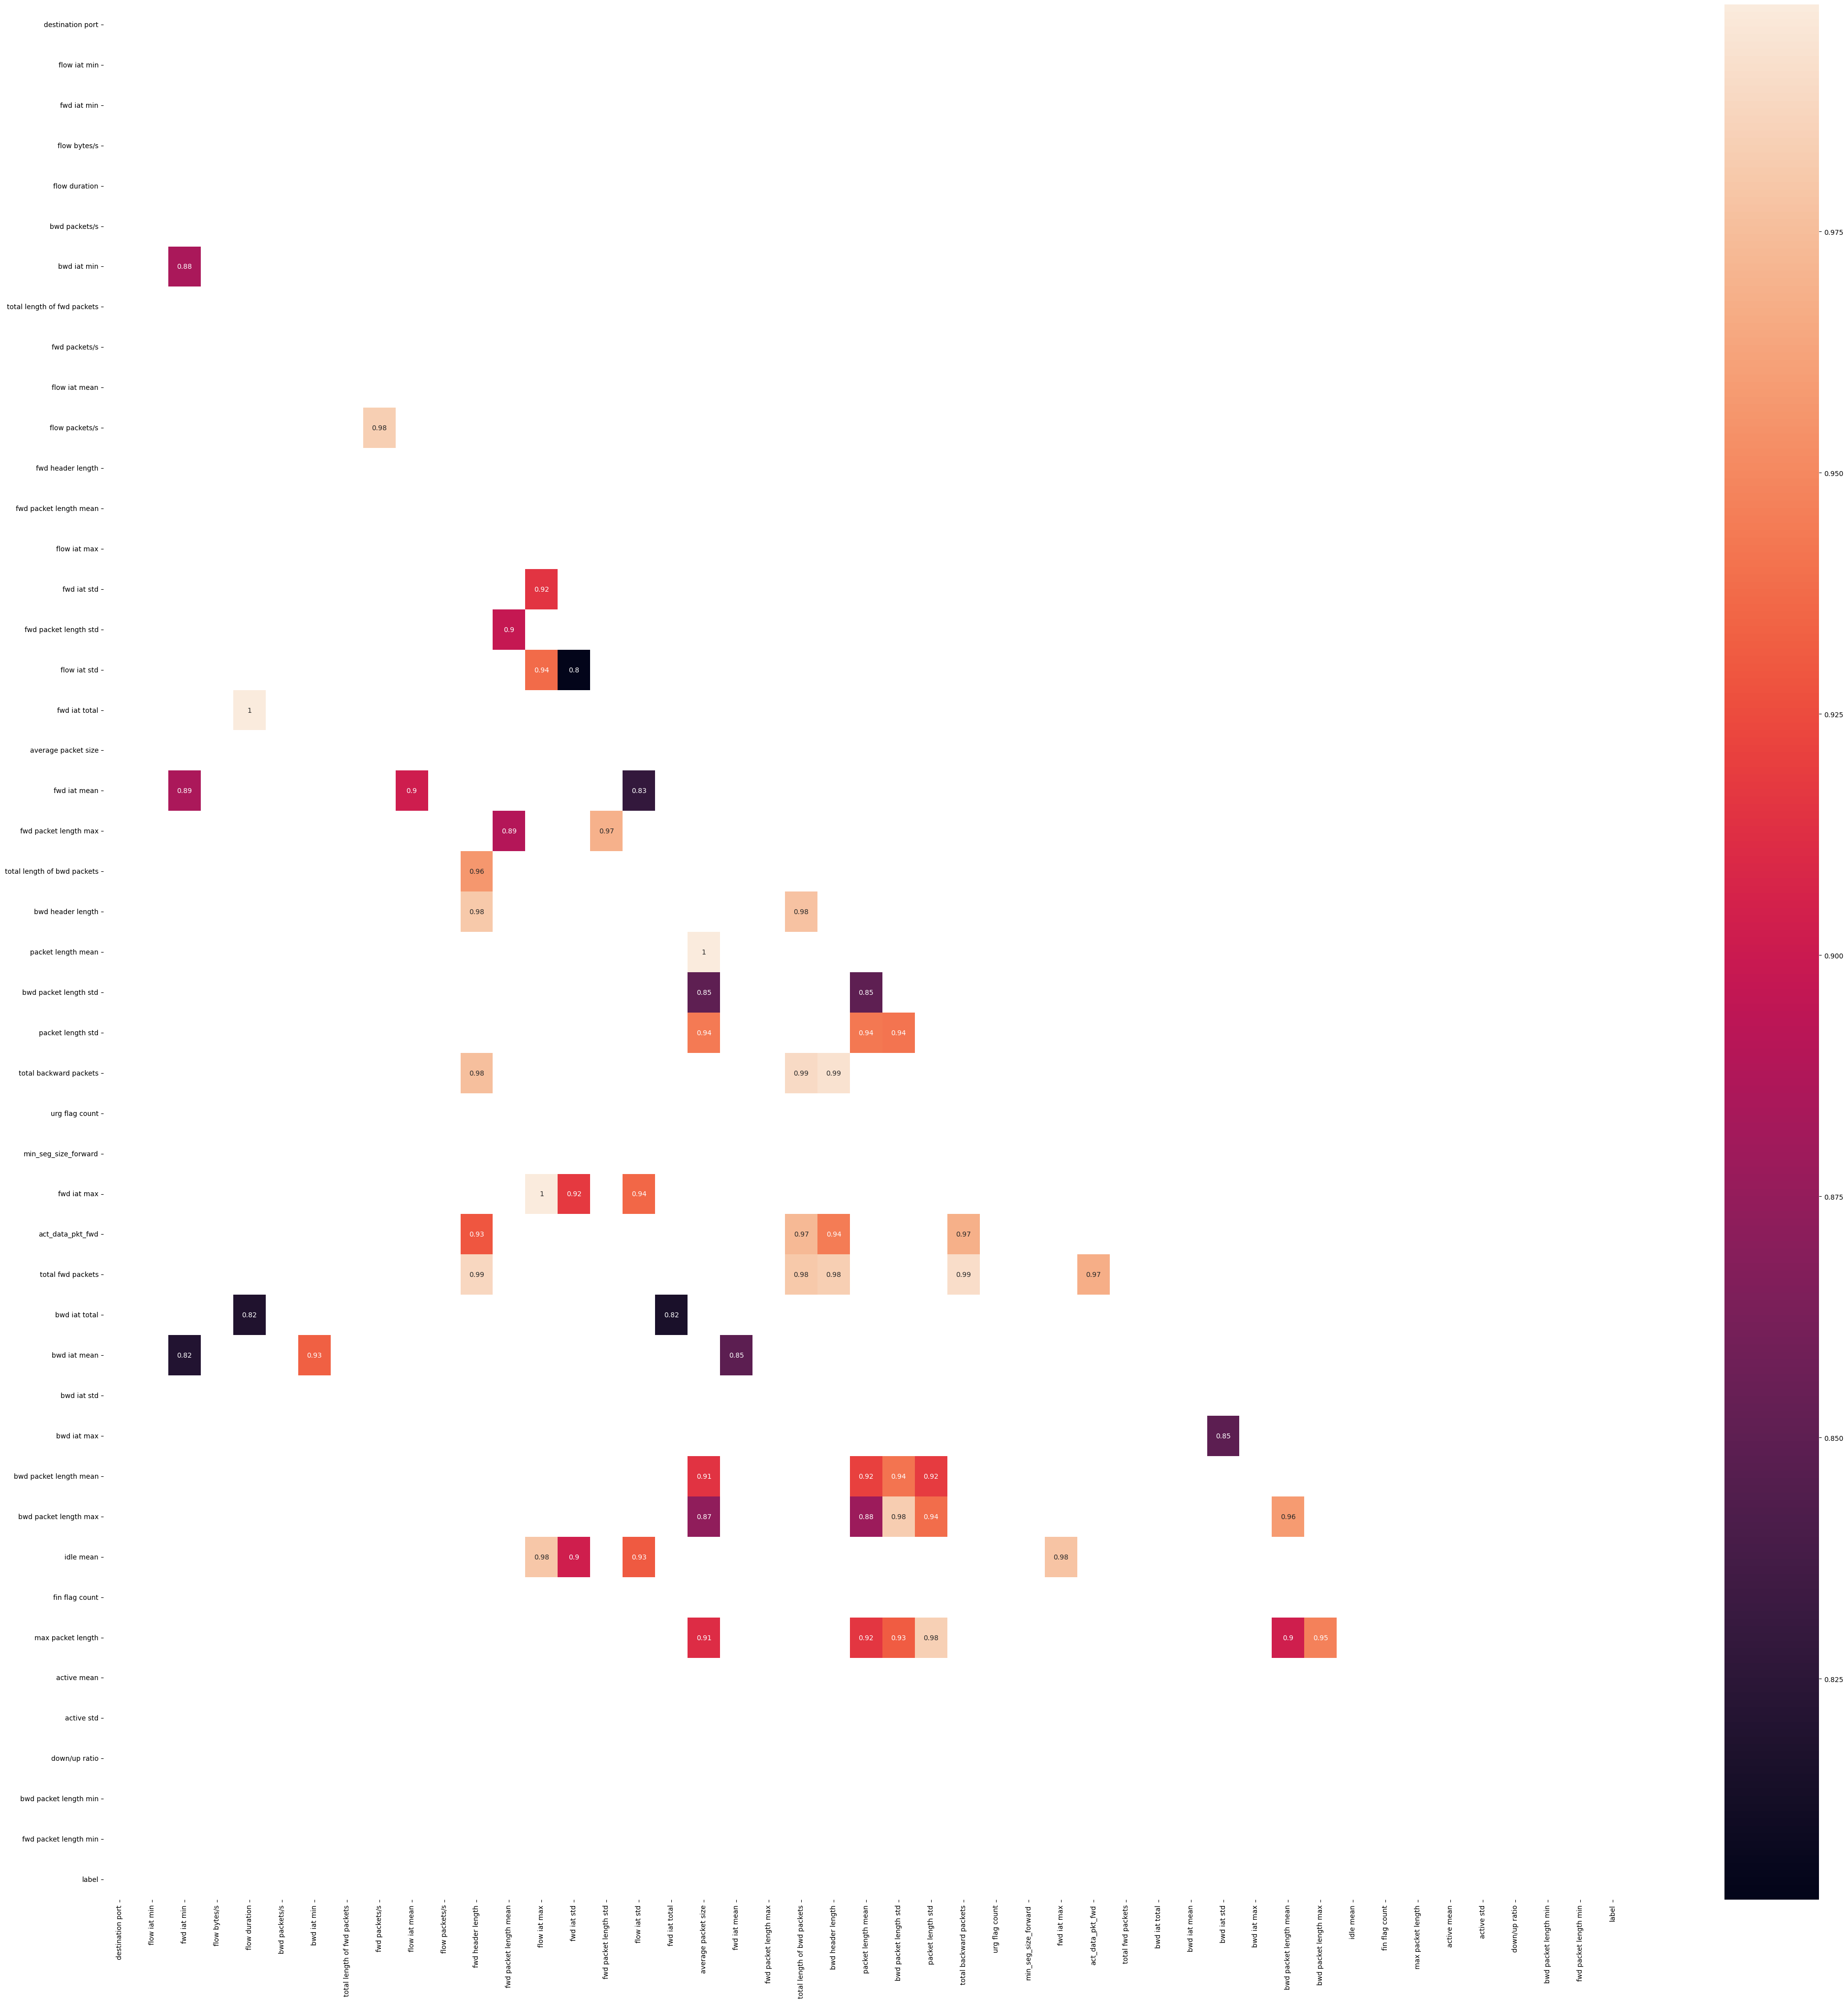

In [43]:
df_3 = df[[x for x in Top_46_feature["feature"]]]
df_3["label"] = df["label"]
df_3_matrix = df_3.corr()
mask = np.triu(np.ones_like(df_3_matrix , dtype=bool))
high_corr = df_3_matrix[(df_3_matrix > 0.8) | (df_3_matrix < -0.8)]
plt.figure(figsize=(50,50))
sns.heatmap(high_corr , mask=mask ,  annot= True )
plt.savefig("heatmap_for_high_corr.svg", dpi=300, bbox_inches='tight')
plt.show()

In [45]:
for i in (Top_46_feature.index) :
  print(f"{i}. {Top_46_feature["feature"][i]}")


1. destination port
2. flow iat min
3. fwd iat min
4. flow bytes/s
5. flow duration
6. bwd packets/s
7. bwd iat min
8. total length of fwd packets
9. fwd packets/s
10. flow iat mean
11. flow packets/s
12. fwd header length
13. fwd packet length mean
14. flow iat max
15. fwd iat std
16. fwd packet length std
17. flow iat std
18. fwd iat total
19. average packet size
20. fwd iat mean
21. fwd packet length max
22. total length of bwd packets
23. bwd header length
24. packet length mean
25. bwd packet length std
26. packet length std
27. total backward packets
28. urg flag count
29. min_seg_size_forward
30. fwd iat max
31. act_data_pkt_fwd
32. total fwd packets
33. bwd iat total
34. bwd iat mean
35. bwd iat std
36. bwd iat max
37. bwd packet length mean
38. bwd packet length max
39. idle mean
40. fin flag count
41. max packet length
42. active mean
43. active std
44. down/up ratio
45. bwd packet length min
46. fwd packet length min


In [48]:
high_corr_features = df[["fwd iat min" , "flow duration" , "bwd iat min" , "fwd packets/s" , "flow iat mean" ,
                         "fwd header length", "fwd packet length mean", "flow iat max", "fwd iat std","fwd packet length std",
                         "flow iat std","fwd iat total","average packet size","fwd iat mean" , "total length of bwd packets", "bwd header length",
                         "packet length mean", "bwd packet length std","packet length std", "total backward packets" , "act_data_pkt_fwd","total fwd packets",
                         "bwd iat std" , "bwd packet length mean", "bwd packet length max"
                       ]]
high_corr_features["label"] = df["label"]
high_corr_features.head()

/tmp/ipython-input-3968185901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_corr_features["label"] = df["label"]


,fwd iat min,flow duration,bwd iat min,fwd packets/s,flow iat mean,fwd header length,fwd packet length mean,flow iat max,fwd iat std,fwd packet length std,...,packet length mean,bwd packet length std,packet length std,total backward packets,act_data_pkt_fwd,total fwd packets,bwd iat std,bwd packet length mean,bwd packet length max,label
0,3.0,3.0,0,666666.687500,3.0,40.0,6.0,3.0,0.0,0.0,...,6.0,0.0,0.0,0,1,2,0.0,0.0,0,0
1,0.0,109.0,0,9174.311523,109.0,20.0,6.0,109.0,0.0,0.0,...,6.0,0.0,0.0,1,0,1,0.0,6.0,6,0
2,0.0,52.0,0,19230.769531,52.0,20.0,6.0,52.0,0.0,0.0,...,6.0,0.0,0.0,1,0,1,0.0,6.0,6,0
3,0.0,34.0,0,29411.765625,34.0,20.0,6.0,34.0,0.0,0.0,...,6.0,0.0,0.0,1,0,1,0.0,6.0,6,0
4,3.0,3.0,0,666666.687500,3.0,40.0,6.0,3.0,0.0,0.0,...,6.0,0.0,0.0,0,1,2,0.0,0.0,0,0


## Feature importance of high correlated feature to remove the less importance of the two high correlated

Feature importance from LightGBM:
                        feature  importance
0                   fwd iat min        2206
1                 flow duration        1377
5             fwd header length        1286
3                 fwd packets/s        1253
6        fwd packet length mean        1244
4                 flow iat mean        1228
8                   fwd iat std         995
12          average packet size         993
2                   bwd iat min         925
9         fwd packet length std         852
10                 flow iat std         808
22                  bwd iat std         801
15            bwd header length         797
7                  flow iat max         794
11                fwd iat total         740
13                 fwd iat mean         603
14  total length of bwd packets         558
18            packet length std         551
20             act_data_pkt_fwd         542
17        bwd packet length std         519
16           packet length mean         45

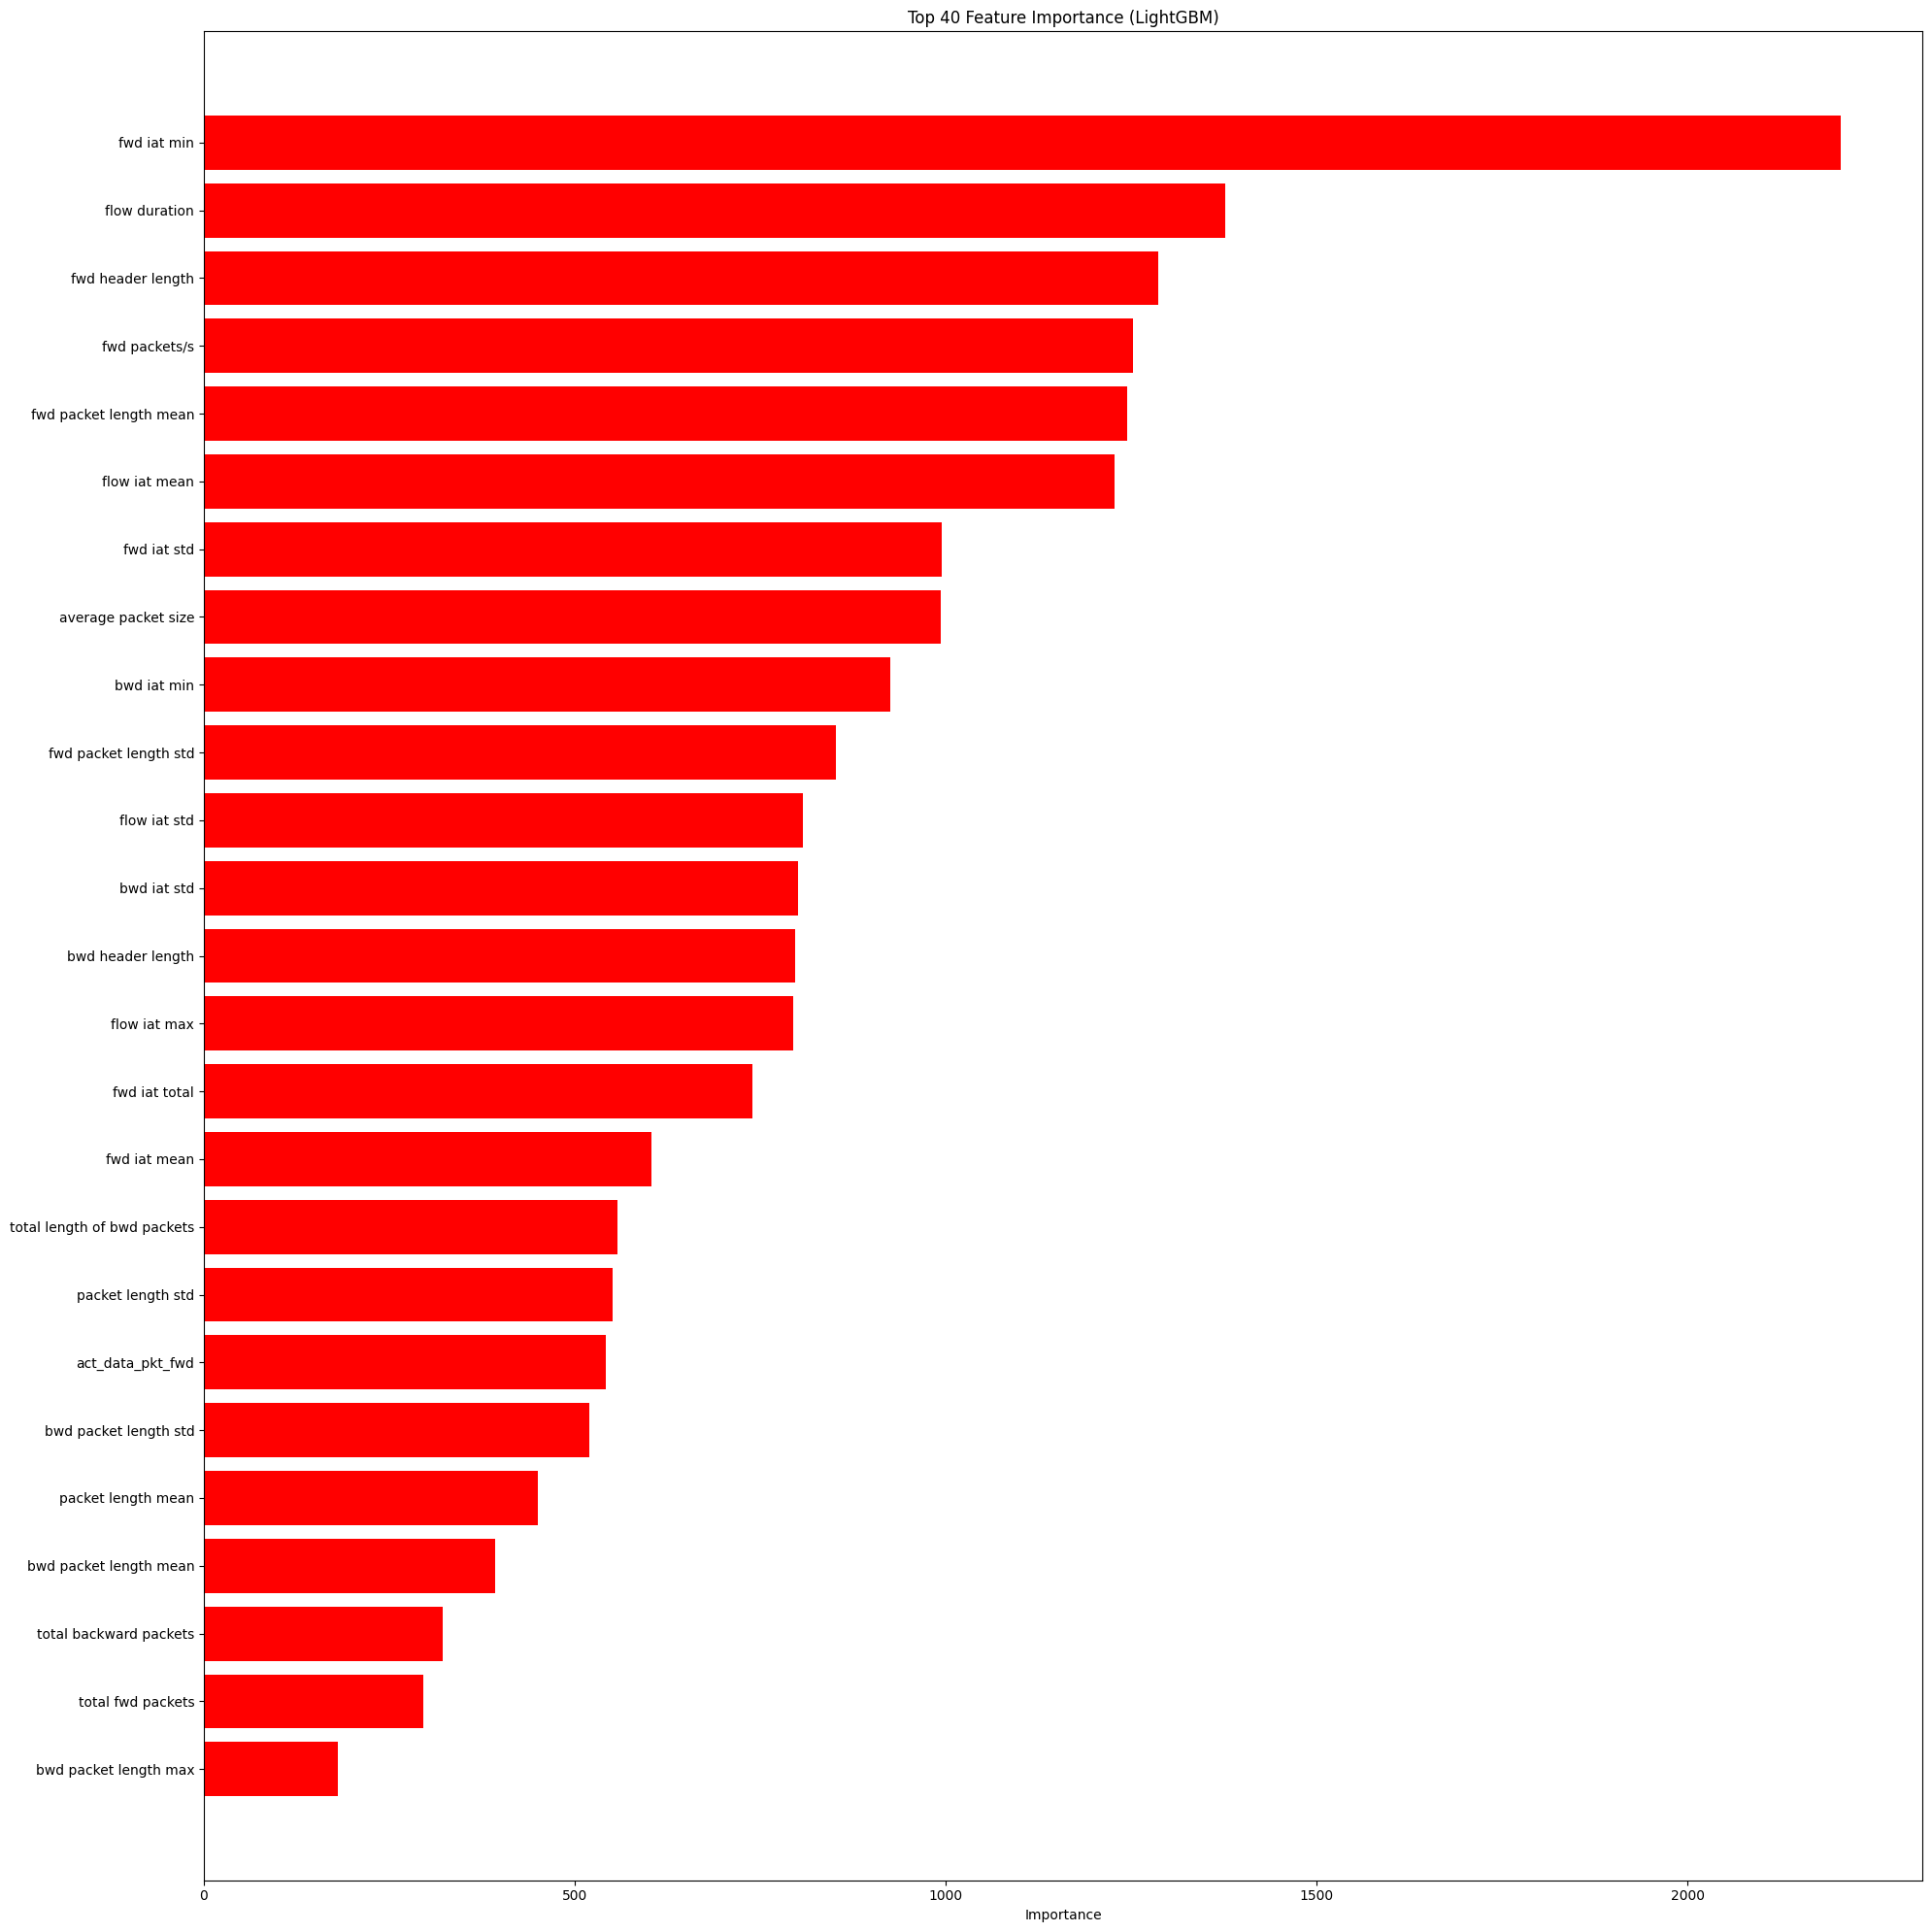

In [49]:
from lightgbm import LGBMClassifier


df_sample = high_corr_features.sample(n=400_000, random_state=42)
x = df_sample.drop(columns=["label"])
y = df_sample["label"]

model = LGBMClassifier(
    n_estimators=100,
    random_state=42,
    verbose=-1
)

model.fit(x, y)
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": x.columns,
    "importance": feature_importance
}).sort_values(by="importance", ascending=False)

print("Feature importance from LightGBM:")
print(importance_df)


plt.figure(figsize=(20, 20))
plt.barh(importance_df["feature"][:40], importance_df["importance"][:40] , color = "red" )
plt.gca().invert_yaxis()
plt.title("Top 40 Feature Importance (LightGBM)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [50]:
filtered_high_corr_features =  df[["fwd iat min" , "flow duration"   , "flow iat mean" ,
                         "flow iat max", "fwd iat std",
                         "flow iat std","average packet size",
                         "packet length mean", "bwd packet length std","packet length std" ,
                         "bwd packet length mean", "bwd packet length max"
                       ]]
filtered_high_corr_features.shape

(2470833, 12)

In [51]:
final_df = df[[x for x in Top_46_feature["feature"]]]
final_df["label"] = df["label"]
final_df.shape

/tmp/ipython-input-70277157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["label"] = df["label"]


(2470833, 47)

## After removing high correlated number of features become (33)

In [52]:
final_df.drop(columns=["bwd iat min" , "fwd packets/s" , "fwd header length" ,
                       "fwd packet length mean" , "fwd packet length std" , "fwd iat total" , "fwd iat mean" , "total length of bwd packets",
                        "bwd header length" , "total backward packets" , "act_data_pkt_fwd","total fwd packets",  "bwd iat std" ] , inplace = True)
final_df.shape

/tmp/ipython-input-2817007475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=["bwd iat min" , "fwd packets/s" , "fwd header length" ,


(2470833, 34)

In [53]:
final_df.head()

,destination port,flow iat min,fwd iat min,flow bytes/s,flow duration,bwd packets/s,total length of fwd packets,flow iat mean,flow packets/s,flow iat max,...,bwd packet length max,idle mean,fin flag count,max packet length,active mean,active std,down/up ratio,bwd packet length min,fwd packet length min,label
0,54865,3.0,3.0,4.000000e+06,3.0,0.000000,12,3.0,666666.687500,3.0,...,0,0.0,0,6,0.0,0.0,0,0,6,0
1,55054,109.0,0.0,1.100917e+05,109.0,9174.311523,6,109.0,18348.623047,109.0,...,6,0.0,0,6,0.0,0.0,1,6,6,0
2,55055,52.0,0.0,2.307692e+05,52.0,19230.769531,6,52.0,38461.539062,52.0,...,6,0.0,0,6,0.0,0.0,1,6,6,0
3,46236,34.0,0.0,3.529412e+05,34.0,29411.765625,6,34.0,58823.531250,34.0,...,6,0.0,0,6,0.0,0.0,1,6,6,0
4,54863,3.0,3.0,4.000000e+06,3.0,0.000000,12,3.0,666666.687500,3.0,...,0,0.0,0,6,0.0,0.0,0,0,6,0
